### Student Name: Aidan Keeshan
### Student ID: 18200117

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

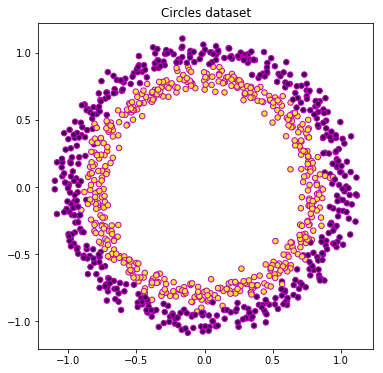

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, marker='o', s=30, edgecolors='m')
plt.title("Circles dataset")
plt.show()